# CSE391 
## Assignment 1
##  Due: Oct 5th at 11.59 pm
## Generate 5000 two-dimensional  samples from a normal distribution with  mean $x=[10,20]$ and covariance matrix 
$S=\begin{bmatrix}
    3& 4  \\
    4& 8 \\
\end{bmatrix}$

## Perform the following steps

- generate the scatter plot of these two-dimensional data
- center the data 
- generate the scatter plot of after centering the data 
- compute the sample covariance matrix and compare it with the acual covariance of the distribution
- are these two covariance matrices identical? if not what is the best way to make them as close of as possible ? 
- compute the eigen vectors and values of the covariance matrix using np.linalg.eig; this way you decompose the covariance martix, i.e.
$S = E DE^{-1}$ where $E$ is the eigen vector matrix and $D$ is a diagonal matrix whose elements are eigen values. If you have no knowledge of eigen vectors and values, don't worry. The main objective of the assignment is not about eigen vectors and values. We will talk about them later in the course. (check)
- transform the data matrix by $E^T$, i.e. , $X_t = E^T X$

- generate the scatter plot of the two-dimensional data $X_t$. What change you observe in the scatter plot and what is the implication of this transformation?
- transform the data matrix $X_t$ by $D^{-0.5}$, i.e. , $X_w = D^{-0.5} X_t$
- generate the scatter plot of the two-dimensional data $X_w$ .What change you observe in the scatter plot and what is implication of this transformation?

# provide the code, explanation, and scatter plot in an ipynb file such that we can run it on Jupyter notebook. 


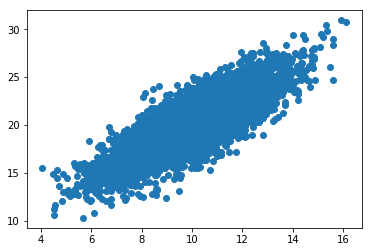

(5000, 2)

In [106]:

import numpy as np
import pylab as plt
from numpy import linalg as LA
from sklearn import preprocessing

mean = [10, 20] # mean
cov = [[3, 4], [4, 8]]  # covariance
S = np.random.multivariate_normal(mean, cov, 5000)
plt.scatter(S[:,0], S[:,1])
plt.show()
S.shape


[5.56170665e-15 1.36207934e-14]
[1. 1.]


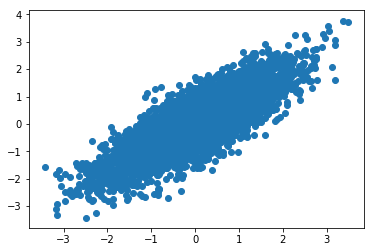

In [107]:
# centering the data
centered = preprocessing.scale(S)
print(centered.mean(axis = 0))
print(centered.std(axis = 0))

# scatter plot data
plt.scatter(centered[:,0], centered[:,1])
plt.show()

In [108]:
# compute sample covariance matrix
X = np.stack((x, y), axis=0)
print('Sample Covariance Matrix: ')
print(np.cov(X)) # print sample covariance matrix and compare with actual covariance.

# The sample covariance matrix is close to but not exactly equal to the actual covariance matrix.
# In order to get the sample covariance matrix closer and closer to the actual covariance matrix,
# you need to increase the sample size higher and higher. So, 50000, 500000, 5000000 sample sizes
# will have a sample covariance matrix that gets closer and closer to the actual covariance matrix.

Sample Covariance Matrix: 
[[2.95241648 3.88973607]
 [3.88973607 7.79496233]]


In [109]:
# computing the eigenvectors and eigenvalues of the covariance matrix
v = LA.eig(cov)
print('Eigenvectors and Eigenvalues of COV Matrix: ')
print(v)


Eigenvectors and Eigenvalues of COV Matrix: 
(array([ 0.78300943, 10.21699057]), array([[-0.87464248, -0.48476853],
       [ 0.48476853, -0.87464248]]))


In [110]:
a = v[1]
a_inv = LA.inv(a)
b = np.diag(a[0])
s = a.dot(b).dot(a_inv)
s.shape


(2, 2)

(5000, 2)

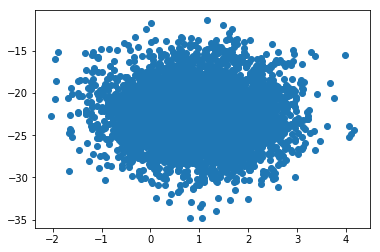

In [111]:
sT = (a.T).dot(S.T)
sT = sT.T
plt.scatter(sT[:,0], sT[:,1])
sT.shape

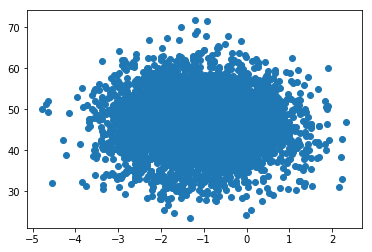

In [112]:
sW = LA.inv(b).dot(sT.T)
sW = sW.T
plt.scatter(sW[:,0], sW[:,1])